In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-sales-2024/vgchartz-2024.csv


## The dataset is about game sales in 2024  which has the following columns



#  The dataset is about game sales in 2024 And I want to predict The total sales.
## this data set has the following columns
### img
### title = the title (games name)
### console = the console (The platforms which the games were sold on)
### genre = the genre
### publisher = the publisher
### developer = the developer
### critic_score = the metacritic score (out of 10)
### total_sales = the global sales in millions
### pal_sales = the PAL sales in millions
### other_sales = Other sales in millions
### release_date = the release date
### last_update = the last date that the data in the row was updated

### link of data base [video game sales 2024 ] is (https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024/data)





##### در قسمت زیر دیتا ست رو خوندیم و سپس شروع کردیم به پر کردن داده های null
##### ستون توتال سیلز رو با جمع سه ستون na,pal,other پرکردیم
##### ستون امتیازات رو median گرفتیم و پر کردیم
##### ستون دولوپر رو برابر گذاشتیم با پابلیشر پر کنه
##### در نهایت مقدار ریلیز دیت رو هم به دیت تایم تبدیل کردیم 

In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/video-game-sales-2024/vgchartz-2024.csv'
data = pd.read_csv(file_path)

# Step 1: Calculate 'total_sales' where it is missing by summing regional sales
data['total_sales'] = data['total_sales'].fillna(data[['na_sales', 'pal_sales', 'other_sales']].sum(axis=1))

# Step 2: Impute missing 'critic_score' with the median of available scores
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].median())

# Step 3: Fill missing 'developer' values with 'Publisher'
data['developer'] = data['developer'].fillna(data['publisher'])

# Step 4: Convert 'release_date' and 'last_update' to datetime, keeping NaT for missing values
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')


# Display the result
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           64016 non-null  object        
 1   title         64016 non-null  object        
 2   console       64016 non-null  object        
 3   genre         64016 non-null  object        
 4   publisher     64016 non-null  object        
 5   developer     64016 non-null  object        
 6   critic_score  64016 non-null  float64       
 7   total_sales   64016 non-null  float64       
 8   na_sales      12637 non-null  float64       
 9   jp_sales      6726 non-null   float64       
 10  pal_sales     12824 non-null  float64       
 11  other_sales   15128 non-null  float64       
 12  release_date  56965 non-null  datetime64[ns]
 13  last_update   17879 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 6.8+ MB
None
               

In [3]:
data.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales         0
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

### مقدار آخرین اپدیت رو چون در پریدکت تاثیری نداشت دراپ کردیم


In [4]:
# Drop the 'last_update' column
data = data.drop(columns=['last_update'])

data.head(10)


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.5,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13


#### فیچر img رو هم دراپ کردیم 


In [5]:
data = data.drop(columns=['img'])

data.head(10)



,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.5,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08
6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26
8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13
9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13


###  چون داده های این ستون به نسبت بقیه گشور ها متفاوت بود و به نسبت اون ها پرت حساب میشد احتمال داشت دقت مدل پایین بیاد حذفش کردیم


In [6]:
data = data.drop(columns=['jp_sales'])

data.head(10)


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.5,15.86,9.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,6.05,2.44,2015-11-06
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,4.29,1.33,2011-11-08
6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,3.73,1.14,2010-11-09
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,6.21,2.26,2018-10-26
8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,4.32,1.20,2012-11-13
9,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,5.88,2.28,2012-11-13


In [7]:
data.isna().sum()

title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales         0
na_sales        51379
pal_sales       51192
other_sales     48888
release_date     7051
dtype: int64

##### اینجا هم مقادیری na و other رو که نال داشتن پر کردیم 
##### مقدار ریلیز دیت رو هم نامریک کردیم اگر بود اگر نبود با مدیان پر کردیم

In [8]:


# Create a dictionary with each column and its fill value
fill_values = {
    'na_sales': data['na_sales'].median(),
    'other_sales': data['other_sales'].median(),
    # For release_date, use the mode or another approach if it’s non-numeric
    'release_date': data['release_date'].mode()[0] if not pd.api.types.is_numeric_dtype(data['release_date']) else data['release_date'].median()
}

# Use fillna with the dictionary
data.fillna(fill_values, inplace=True)


In [9]:
data.isna().sum()

title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales         0
na_sales            0
pal_sales       51192
other_sales         0
release_date        0
dtype: int64

#### مقدار رو با استقاده از مدیان پر کردیم

In [10]:
fill_values = {
    'pal_sales': data['pal_sales'].median(),
}
data.fillna(fill_values, inplace=True)

In [11]:
data.isna().sum()


title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
pal_sales       0
other_sales     0
release_date    0
dtype: int64

#### در قسمت زیر هم اومدیم زد اسکور رو اعمال کردییم برای یافتن داده های اوت لایر وحذف اونها

In [12]:
import numpy as np



# Columns to analyze
columns = [ 'pal_sales', 'other_sales', 'total_sales']

# Calculate Z-scores and identify outliers for each column
for column in columns:
    # Calculate the Z-scores
    data[f'{column}_Z-Score'] = (data[column] - data[column].mean()) / data[column].std()
    
    # Identify outliers
    outliers = data[(data[f'{column}_Z-Score'] > 3) | (data[f'{column}_Z-Score'] < -3)]
    print(f"Outliers in {column}:")
    print(outliers[[column]])
    print("\n")
    
    # Optionally, remove the outliers directly
    data = data[(data[f'{column}_Z-Score'] <= 3) & (data[f'{column}_Z-Score'] >= -3)]

# Drop the Z-Score columns if not needed anymore
data.drop(columns=[f'{column}_Z-Score' for column in columns], inplace=True)

# Print the shape of the cleaned dataset
print("Shape of the dataset without outliers:", data.shape)

# Display the first few rows of the cleaned dataset
print(data.head())




Outliers in pal_sales:
      pal_sales
0          9.85
1          9.71
2          5.49
3          5.33
4          6.05
...         ...
1830       0.65
1840       0.63
2135       0.68
2395       0.66
2450       0.64

[627 rows x 1 columns]


Outliers in other_sales:
      other_sales
75           0.71
91           1.48
94           0.66
139          0.56
176          2.93
...           ...
6574         0.21
6577         0.12
7080         0.19
7492         0.18
8495         0.12

[717 rows x 1 columns]


Outliers in total_sales:
      total_sales
114          4.53
125          4.31
135          4.17
136          4.16
339          2.60
...           ...
2805         0.59
2806         0.59
2807         0.59
2808         0.59
2809         0.59

[1524 rows x 1 columns]


Shape of the dataset without outliers: (61148, 11)
                                   title console   genre   publisher  \
2810                              NHL 12     PS3  Sports   EA Sports   
2811       Cabela's Dangerous

##### اینجا اومدیم مقادیر فیچر na_sales رو به جا اینکه حذف کنیم تو یه بازه مشخص محدود کردیم که خارج از اون بازه اوت لایر تشخیص داده بشه


In [13]:
import numpy as np

# Reapply capping for 'na_sales'
na_sales_upper_limit = data['na_sales'].mean() + 3 * data['na_sales'].std()
data['na_sales'] = np.where(data['na_sales'] > na_sales_upper_limit, na_sales_upper_limit, data['na_sales'])

# Display updated dataset statistics for 'na_sales'
data['na_sales'].describe()


count    61148.000000
mean         0.117386
std          0.031384
min          0.000000
25%          0.120000
50%          0.120000
75%          0.120000
max          0.240437
Name: na_sales, dtype: float64

In [14]:
print(data.info())
data.head(10)



<class 'pandas.core.frame.DataFrame'>
Index: 61148 entries, 2810 to 64015
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         61148 non-null  object        
 1   console       61148 non-null  object        
 2   genre         61148 non-null  object        
 3   publisher     61148 non-null  object        
 4   developer     61148 non-null  object        
 5   critic_score  61148 non-null  float64       
 6   total_sales   61148 non-null  float64       
 7   na_sales      61148 non-null  float64       
 8   pal_sales     61148 non-null  float64       
 9   other_sales   61148 non-null  float64       
 10  release_date  61148 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 5.6+ MB
None


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,pal_sales,other_sales,release_date
2810,NHL 12,PS3,Sports,EA Sports,EA Canada,8.6,0.58,0.240437,0.16,0.07,2011-09-13
2811,Cabela's Dangerous Hunts 2011,Wii,Sports,Activision,Cauldron,7.5,0.58,0.240437,0.02,0.04,2010-10-26
2812,Sammy Sosa High Heat Baseball 2001,PS,Sports,3DO,Team .366,7.5,0.58,0.240437,0.22,0.04,2000-02-29
2813,World Cup 98,N64,Sports,EA Sports,EA Canada,7.5,0.58,0.140000,0.40,0.04,1998-05-18
2814,Tony Hawk's Pro Skater 4,GC,Sports,Activision,Neversoft Entertainment,9.2,0.58,0.240437,0.12,0.02,2002-10-23
2815,Disney Magic World 2,3DS,Simulation,Nintendo,High Horse Entertainment,7.5,0.58,0.070000,0.25,0.02,2016-10-14
2816,Farming Simulator 19,PC,Simulation,Focus Home Interactive,Giants Software,7.5,0.58,0.120000,0.55,0.03,2018-11-20
2817,Q*bert,2600,Puzzle,Parker Bros.,Gottlieb,7.5,0.58,0.240437,0.03,0.01,1983-01-01
2818,NCAA Football 09,PS3,Sports,EA Sports,EA Tiburon,7.5,0.58,0.240437,0.04,0.05,2008-07-15
2819,Skate it,Wii,Sports,Electronic Arts,EA Montreal,6.6,0.58,0.240437,0.03,0.04,2008-11-19


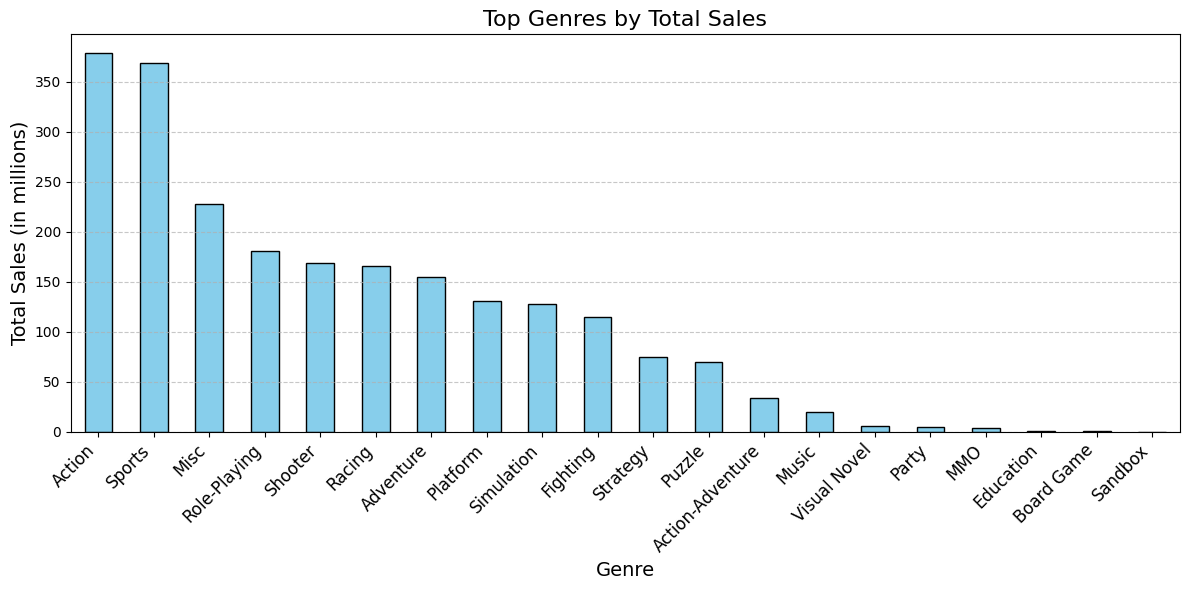

In [15]:
import matplotlib.pyplot as plt

# Group by genre and sum the total sales
genre_sales = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Genres by Total Sales', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


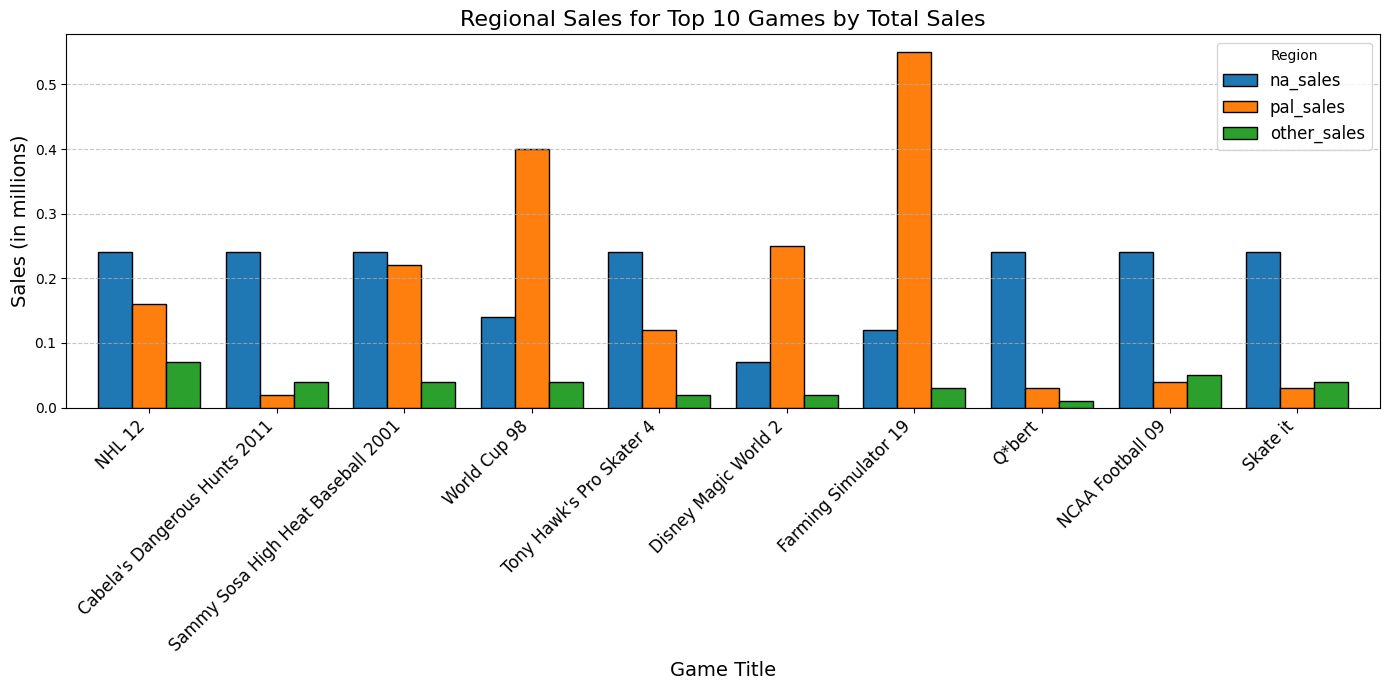

In [16]:
# Select top 10 games by total sales
top_games = data.nlargest(10, 'total_sales')[['title', 'na_sales', 'pal_sales', 'other_sales']]

# Set title as index for better readability in the plot
top_games.set_index('title', inplace=True)

# Plot
top_games.plot(kind='bar', figsize=(14, 7), width=0.8, edgecolor='black')
plt.title('Regional Sales for Top 10 Games by Total Sales', fontsize=16)
plt.xlabel('Game Title', fontsize=14)
plt.ylabel('Sales (in millions)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Region', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


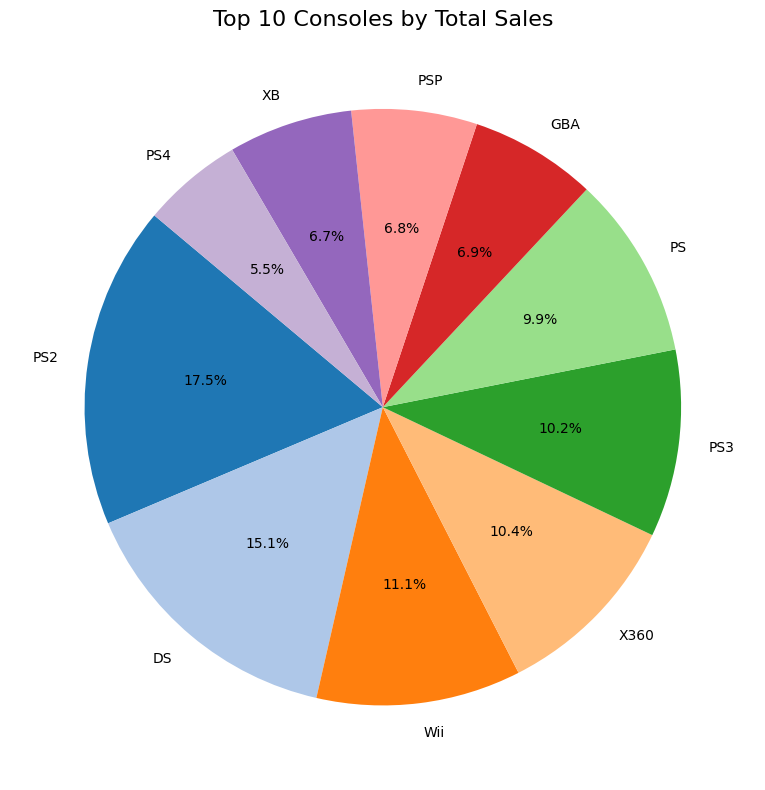

In [17]:
# Group by console and sum the total sales
console_sales = data.groupby('console')['total_sales'].sum().sort_values(ascending=False)

# Select top 10 consoles
top_10_consoles = console_sales.head(10)

# Plot as a pie chart
plt.figure(figsize=(10, 8))
top_10_consoles.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Top 10 Consoles by Total Sales', fontsize=16)
plt.ylabel('')  # Remove y-label for aesthetics
plt.tight_layout()
plt.show()


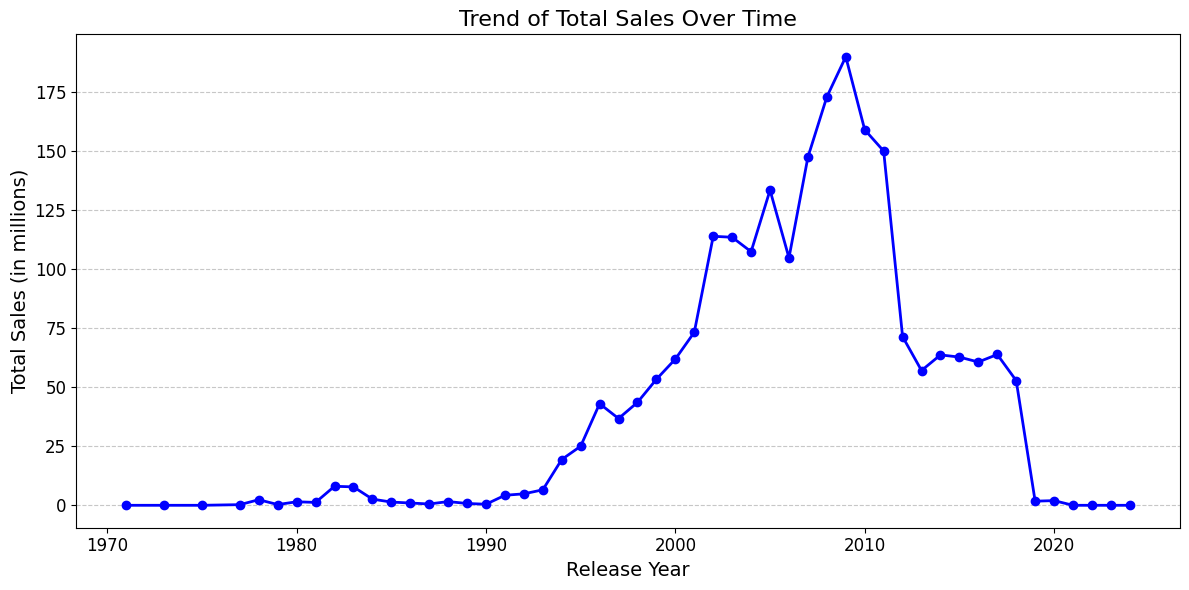

In [18]:


# Convert release_date to datetime to extract the release year
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['release_year'] = data['release_date'].dt.year

# Group by release year and sum the total sales
sales_trend = data.groupby('release_year')['total_sales'].sum().dropna()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Trend of Total Sales Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


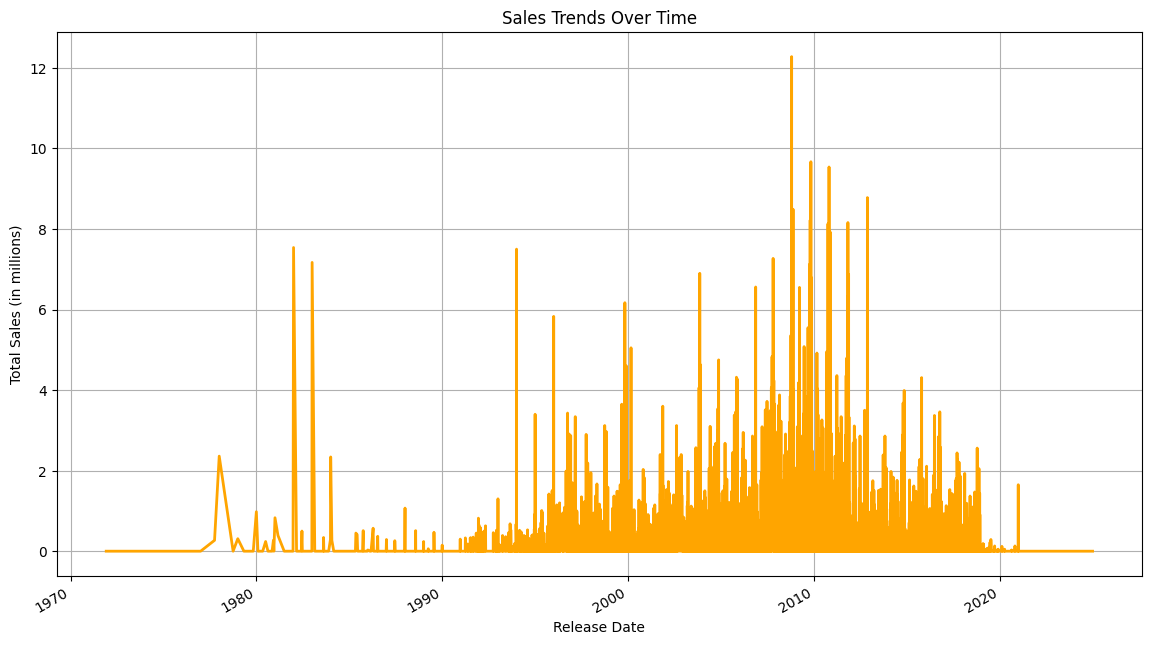

In [19]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data_filtered_time = data[data['release_date'].notnull() & data['total_sales'].notnull()]
sales_trends = data_filtered_time.groupby('release_date')['total_sales'].sum()
plt.figure(figsize=(14, 8))
sales_trends.plot(linewidth=2, color='orange')
plt.title('Sales Trends Over Time')
plt.xlabel('Release Date')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

In [20]:
data = data.drop(columns=['release_date'])


In [21]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['console', 'genre', 'publisher', 'developer',"title"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the transformed data
print(data.head())

data.head(10)

      title  console  genre  publisher  developer  critic_score  total_sales  \
2810  22037       54     17        813       2238           8.6         0.58   
2811   5134       70     17        101       1380           7.5         0.58   
2812  27970       52     17         36       7410           7.5         0.58   
2813  37884       41     17        813       2238           7.5         0.58   
2814  35139       30     17        101       5163           9.2         0.58   

      na_sales  pal_sales  other_sales  release_year  
2810  0.240437       0.16         0.07          2011  
2811  0.240437       0.02         0.04          2010  
2812  0.240437       0.22         0.04          2000  
2813  0.140000       0.40         0.04          1998  
2814  0.240437       0.12         0.02          2002  


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,pal_sales,other_sales,release_year
2810,22037,54,17,813,2238,8.6,0.58,0.240437,0.16,0.07,2011
2811,5134,70,17,101,1380,7.5,0.58,0.240437,0.02,0.04,2010
2812,27970,52,17,36,7410,7.5,0.58,0.240437,0.22,0.04,2000
2813,37884,41,17,813,2238,7.5,0.58,0.140000,0.40,0.04,1998
2814,35139,30,17,101,5163,9.2,0.58,0.240437,0.12,0.02,2002
2815,8691,2,16,2015,3355,7.5,0.58,0.070000,0.25,0.02,2016
2816,11242,49,16,983,3063,7.5,0.58,0.120000,0.55,0.03,2018
2817,25882,0,11,2160,3128,7.5,0.58,0.240437,0.03,0.01,1983
2818,21940,54,17,813,2256,7.5,0.58,0.240437,0.04,0.05,2008
2819,29663,70,17,852,2249,6.6,0.58,0.240437,0.03,0.04,2008


In [22]:
data.to_csv("data.csv")




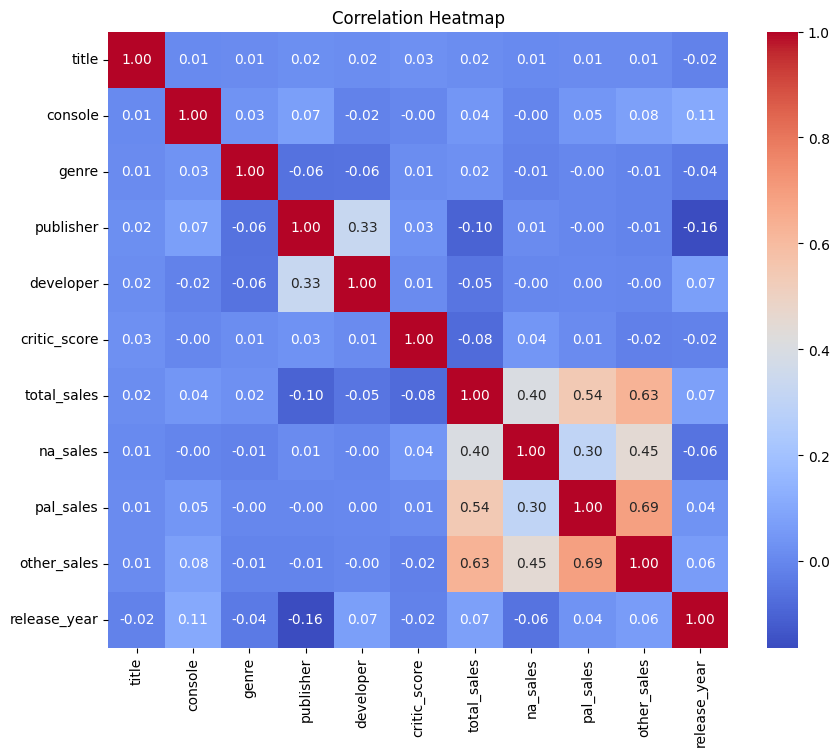

In [23]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

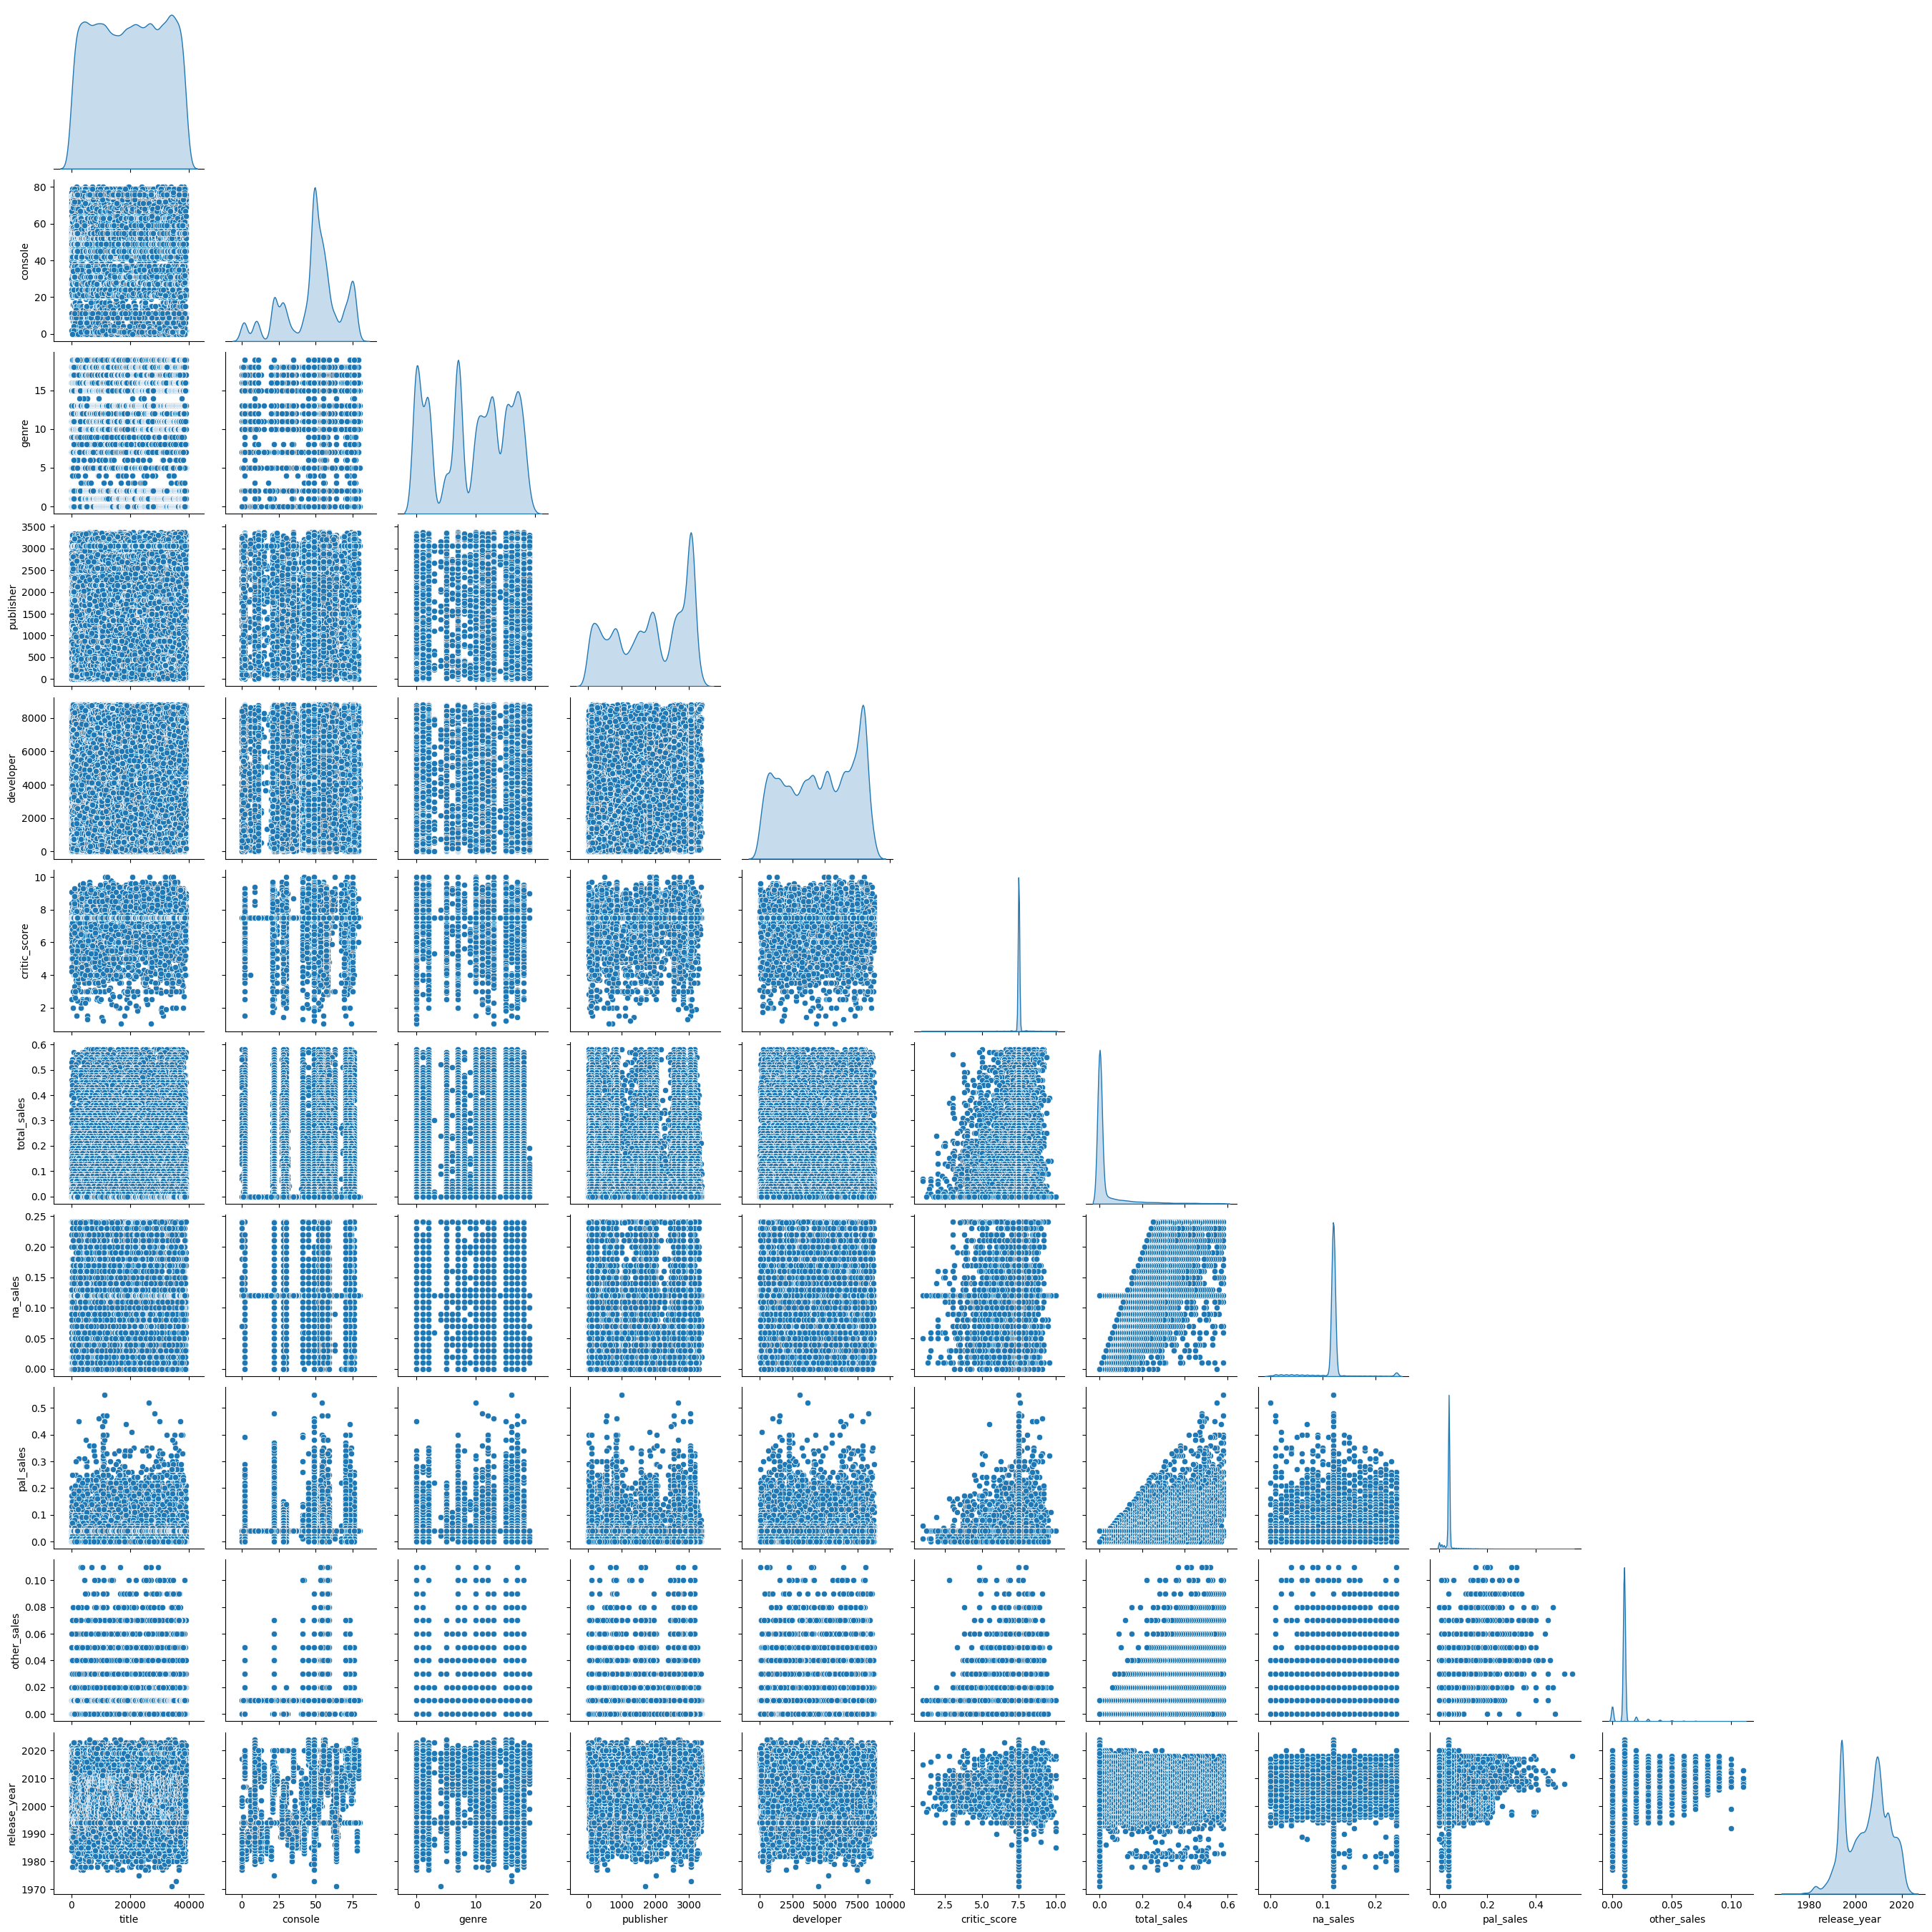

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# رسم pair plot برای تمام ستون‌ها
sns.pairplot(data, diag_kind='kde', corner=True)

# نمایش نمودار
plt.show()


#### انسمبل کردن مدل ها و بررسی اینکه کدوم دقت بیشتری رو داره


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


# Separate features (X) and target (y)
X = data.drop(columns=['total_sales'])  # حذف ستون هدف
y = data['total_sales']  # ستون هدف

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "SVR": SVR(kernel='rbf', C=1, epsilon=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42),
    "CatBoost": cb.CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
}

# Initialize results dictionary
results = {"Model": [], "RMSE": [], "R2 Score": []}

# Train each model and get results
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results["Model"].append(model_name)
    results["RMSE"].append(rmse)
    results["R2 Score"].append(r2)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 48918, number of used features: 10
[LightGBM] [Info] Start training from score 0.036475
                Model      RMSE  R2 Score
0    Ridge Regression  0.071659  0.443383
1   Linear Regression  0.070708  0.458058
2          ElasticNet  0.095593  0.009469
3                 SVR  0.115220 -0.439038
4       Random Forest  0.033824  0.875987
5   Gradient Boosting  0.035701  0.861842
6            AdaBoost  0.070906  0.455016
7                 KNN  0.093733  0.047644
8             XGBoost  0.032870  0.882886
9            LightGBM  0.032769  0.883602
10           CatBoost  0.034539  0.870686


#### انتخاب مدل و بررسی دقت پردیکت کردن با استفاده از رنج و پریدک یک گیم جدید

In [26]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Define features and target
X = data.drop(columns=['total_sales'])
y = data['total_sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05)
lgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Function to predict sales for a new game
def predict_sales(game_features, model, X_columns):
    """
    Predict total sales for a new game based on its features.
    """
    # Convert features into a DataFrame
    game_df = pd.DataFrame([game_features])
    
    # One-hot encode categorical columns
    game_df = pd.get_dummies(game_df)
    
    # Align the new game's features with the model's training columns
    game_df = game_df.reindex(columns=X_columns, fill_value=0)
    
    # Predict total sales
    predicted_sales = model.predict(game_df)[0]
    return predicted_sales

# Function to predict sales with a range
def predict_sales_with_range(game_features, model, X_columns, percentile=90):
    """
    Predict total sales and provide a prediction range for a new game.
    """
    # Convert features into a DataFrame
    game_df = pd.DataFrame([game_features])
    
    # One-hot encode categorical columns
    game_df = pd.get_dummies(game_df)
    
    # Align the new game's features with the model's training columns
    game_df = game_df.reindex(columns=X_columns, fill_value=0)
    
    # Generate predictions using LightGBM's native uncertainty estimation
    # For simplicity, we'll assume the range is ± a scaled standard deviation of residuals
    predicted_sales = model.predict(game_df)[0]
    residuals = y_train - model.predict(X_train)
    std_dev = residuals.std()
    lower_bound = predicted_sales - 1.96 * std_dev
    upper_bound = predicted_sales + 1.96 * std_dev
    
    return predicted_sales, lower_bound, upper_bound

# Example: Predict sales for a new game
new_game = {
    'genre': 'Action',
    'publisher': 'Nintendo',
    'developer': 'Nintendo',
    'console': 'Wii',
    'critic_score': 85
}

predicted_sales, lower, upper = predict_sales_with_range(new_game, lgb_model, X.columns)

print(f"Predicted Total Sales: {predicted_sales:.2f} million units")
print(f"Range: {lower:.2f} - {upper:.2f} million units")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 48918, number of used features: 10
[LightGBM] [Info] Start training from score 0.036475
Model Performance:
MAE: 0.01
MSE: 0.00
R² Score: 0.89
Predicted Total Sales: 0.01 million units
Range: -0.04 - 0.06 million units


MAE (Mean Absolute Error): 0.01
RMSE (Root Mean Squared Error): 0.03
R² Score: 0.89


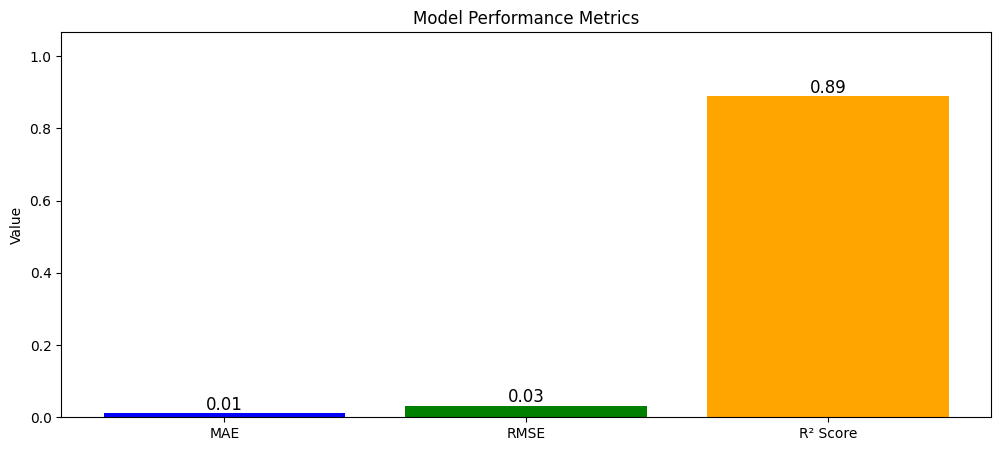

In [27]:



# Predictions on test data
y_pred = lgb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot metrics
metrics = {'MAE': mae, 'RMSE': rmse, 'R² Score': r2}

plt.figure(figsize=(12, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange'])
plt.title('Model Performance Metrics')
plt.ylabel('Value')
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.ylim(0, max(rmse, mae, r2) * 1.2)  # Add some space above bars
plt.show()


In [28]:
# Display dataset with all rows and columns visible in a scrollable format
from IPython.display import display

# Customize how many rows/columns are displayed
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Display the dataframe
display(data)


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,pal_sales,other_sales,release_year
2810,22037,54,17,813,2238,8.6,0.58,0.240437,0.16,0.07,2011
2811,5134,70,17,101,1380,7.5,0.58,0.240437,0.02,0.04,2010
2812,27970,52,17,36,7410,7.5,0.58,0.240437,0.22,0.04,2000
2813,37884,41,17,813,2238,7.5,0.58,0.140000,0.40,0.04,1998
2814,35139,30,17,101,5163,9.2,0.58,0.240437,0.12,0.02,2002
...,...,...,...,...,...,...,...,...,...,...,...
64011,38148,49,19,131,510,7.5,0.00,0.120000,0.04,0.01,2016
64012,38401,55,19,2022,5263,7.5,0.00,0.120000,0.04,0.01,2020
64013,38401,45,19,2022,5263,7.5,0.00,0.120000,0.04,0.01,2020
64014,38582,45,19,1349,5470,7.5,0.00,0.120000,0.04,0.01,2019
